In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris, make_moons

In [2]:
iris_data = load_iris()
data_x = iris_data["data"]
data_y = iris_data["target"]

In [5]:
iris_df = pd.DataFrame(np.c_[data_x, data_y], columns=iris_data["feature_names"] + ["classes"])

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Remove suffix

In [8]:
iris_df.columns = iris_df.columns.str.removesuffix("(cm)").str.strip()
iris_df.head()

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
sepal_data_x = data_x[:,:2]
petal_data_x = data_x[:,2:]

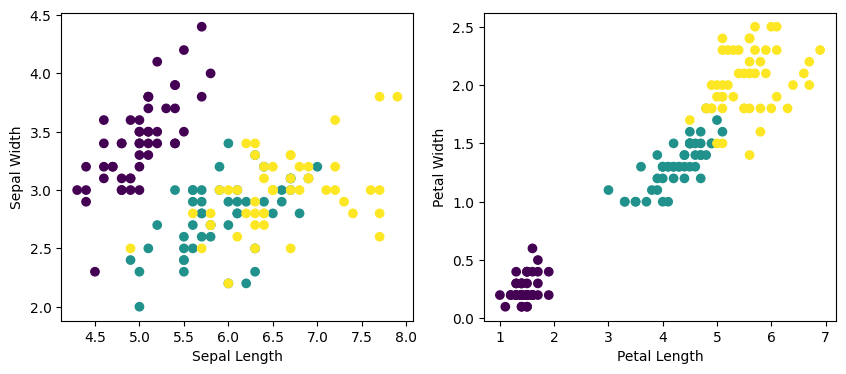

In [15]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.scatter(sepal_data_x[:,0], sepal_data_x[:,1], c=data_y, cmap=plt.cm.viridis)
ax2.scatter(petal_data_x[:,0], petal_data_x[:,1], c=data_y, cmap=plt.cm.viridis)

ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax2.set_xlabel("Petal Length")
ax2.set_ylabel("Petal Width")

plt.show()

## Linear classification in b/w multiple classes

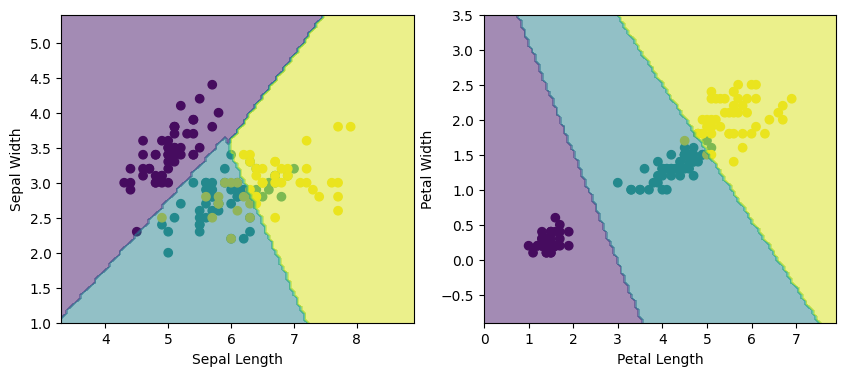

In [17]:
sepal_clf = SVC(kernel="linear", C=1)
petal_clf= SVC(kernel="linear", C=1)

sepal_clf.fit(sepal_data_x, data_y)
petal_clf.fit(petal_data_x, data_y)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4))

ax1.scatter(sepal_data_x[:,0], sepal_data_x[:,1], c=data_y, cmap=plt.cm.viridis)
ax2.scatter(petal_data_x[:,0], petal_data_x[:,1], c=data_y, cmap=plt.cm.viridis)

ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")

ax2.set_xlabel("Petal Length")
ax2.set_ylabel("Petal Width")

sepal_disp = DecisionBoundaryDisplay.from_estimator(sepal_clf, sepal_data_x, ax=ax1, alpha=0.5)
petal_disp = DecisionBoundaryDisplay.from_estimator(petal_clf, petal_data_x, ax=ax2, alpha=0.5)

plt.show()

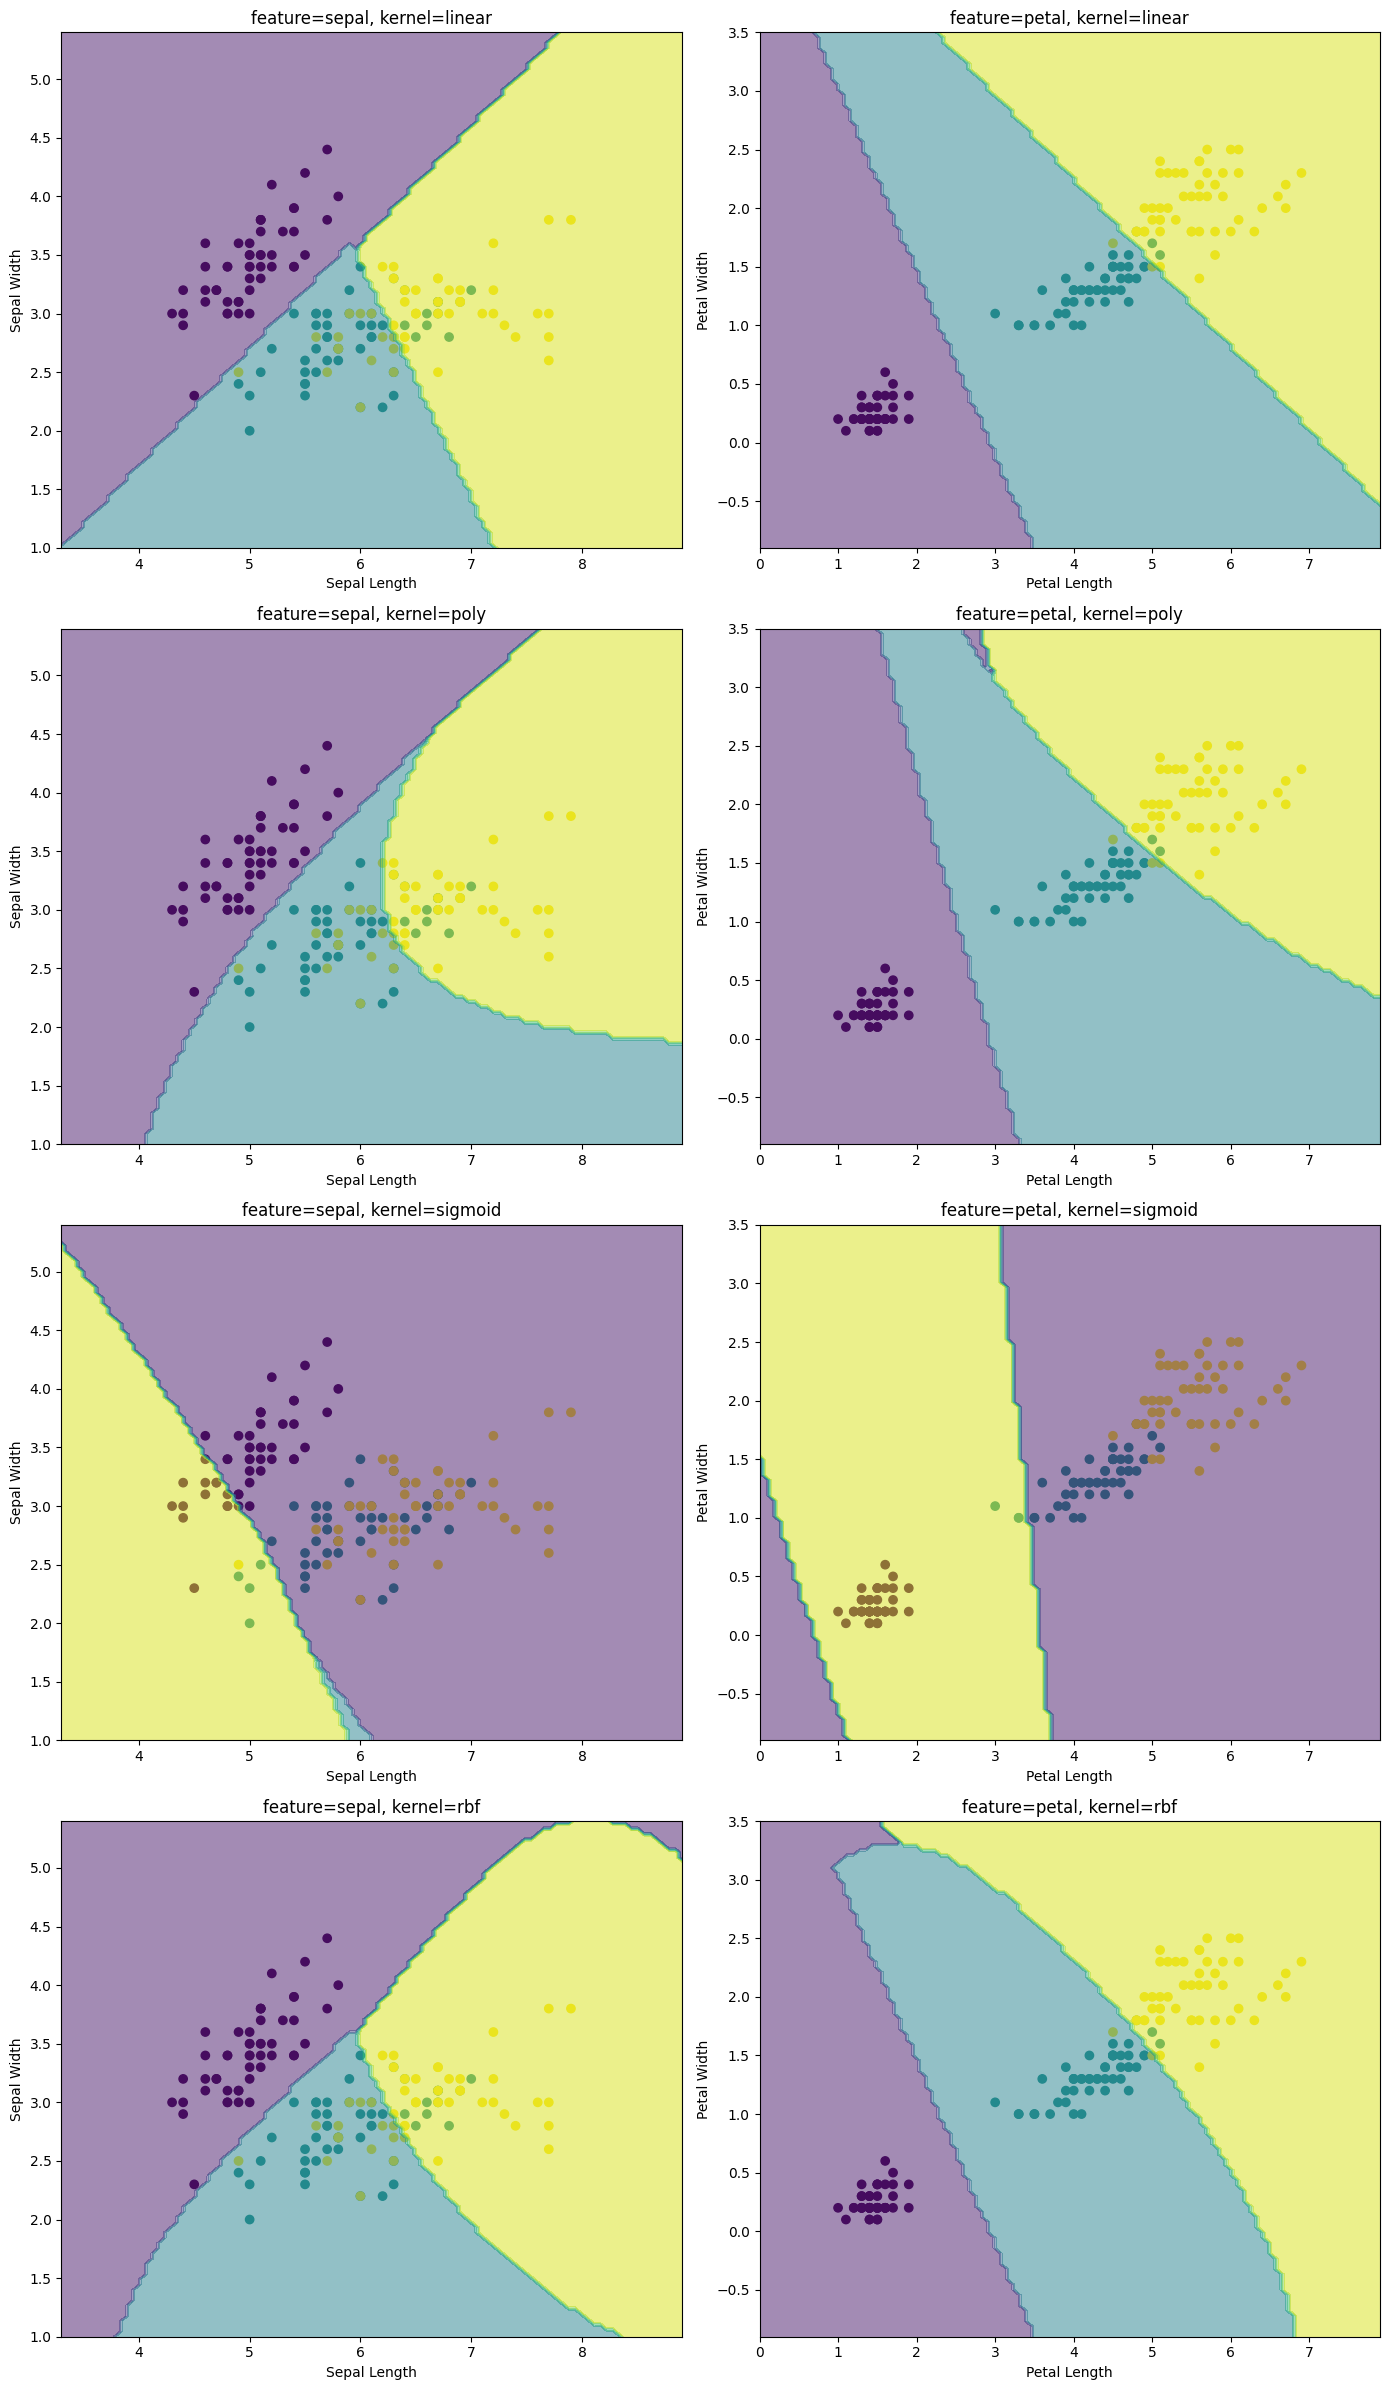

In [18]:
fig, axes = plt.subplots(4,2, figsize=(14,4*6), tight_layout=True)

kernels = ["linear", "poly", "sigmoid", "rbf"]

for kernel, [ax1, ax2] in zip(kernels, axes):
    
    sepal_clf = SVC(kernel=kernel, C=5)
    petal_clf = SVC(kernel=kernel, C=5)
    
    sepal_clf.fit(sepal_data_x, data_y)
    petal_clf.fit(petal_data_x, data_y)
    
    ax1.scatter(sepal_data_x[:, 0], sepal_data_x[:,1], c=data_y, cmap=plt.cm.viridis)
    ax2.scatter(petal_data_x[:, 0], petal_data_x[:,1], c=data_y, cmap=plt.cm.viridis)
    
    ax1.set_xlabel("Sepal Length")
    ax1.set_ylabel("Sepal Width")
    
    ax2.set_xlabel("Petal Length")
    ax2.set_ylabel("Petal Width")

    ax1.set_title(f"feature=sepal, kernel={kernel}")
    ax2.set_title(f"feature=petal, kernel={kernel}")
    sepal_disp = DecisionBoundaryDisplay.from_estimator(sepal_clf, sepal_data_x, ax=ax1, alpha=0.5)
    petal_disp = DecisionBoundaryDisplay.from_estimator(petal_clf, petal_data_x, ax=ax2, alpha=0.5)

plt.show()

In [19]:
def scatter(df, xlabel, ylabel):
    fig, ax1 = plt.subplots(figsize=(7,4))

    ax1.scatter(df[xlabel], df[ylabel], c=data_y, cmap=plt.cm.viridis)
    
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    plt.show()

## Non-Linear Classification

In [21]:
data_x, data_y = make_moons(n_samples=400, noise=0.15)

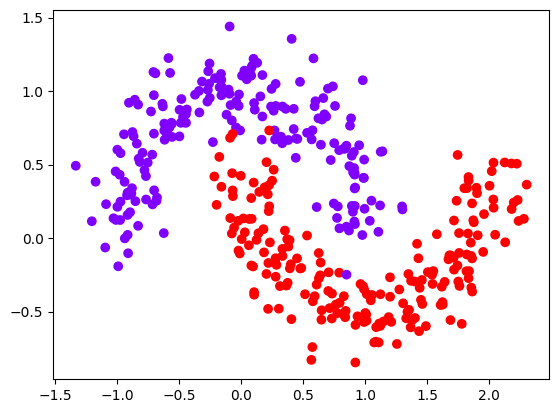

In [22]:
plt.scatter(data_x[:,0], data_x[:,1], c=data_y, cmap=plt.cm.rainbow)

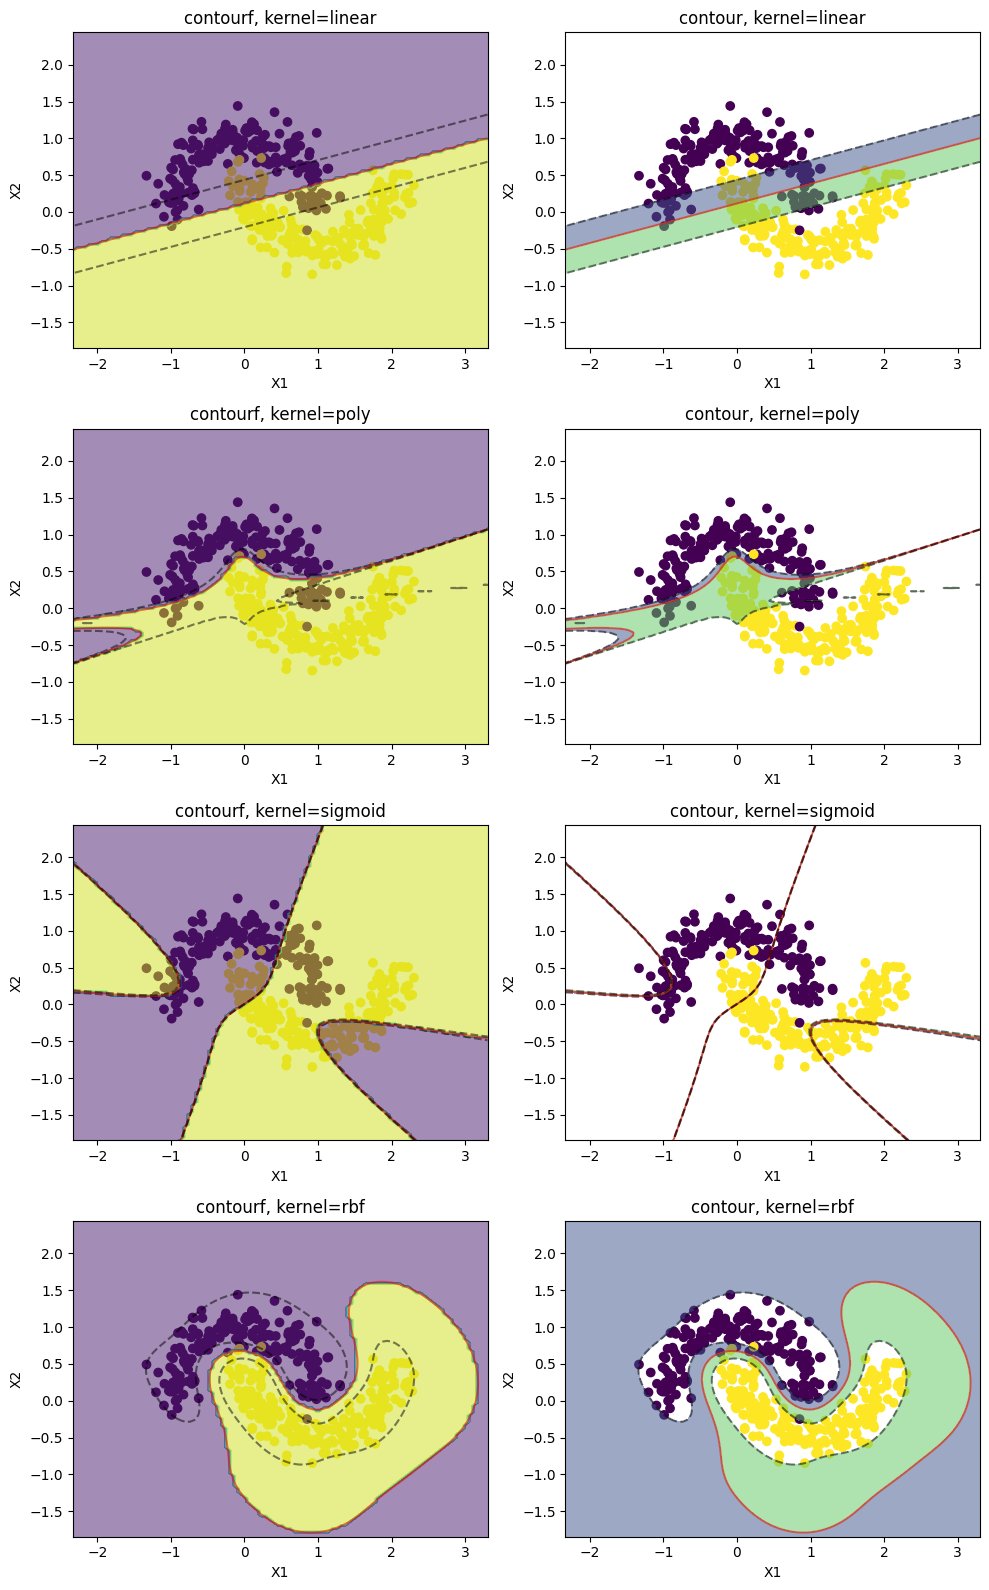

In [27]:
fig, axes = plt.subplots(4,2, figsize=(10,4*4), tight_layout=True)

kernels = ["linear", "poly", "sigmoid", "rbf"]

for kernel, [ax1, ax2] in zip(kernels, axes):
    
    clf = SVC(kernel=kernel, C=5, degree=5, gamma=3)
    
    clf.fit(data_x, data_y)
    clf.fit(data_x, data_y)
    
    ax1.scatter(data_x[:, 0], data_x[:,1], c=data_y, cmap=plt.cm.viridis)
    ax2.scatter(data_x[:, 0], data_x[:,1], c=data_y, cmap=plt.cm.viridis)
    
    ax1.set_xlabel("X1")
    ax1.set_ylabel("X2")
    
    ax2.set_xlabel("X1")
    ax2.set_ylabel("X2")

    ax1.set_title(f"contourf, kernel={kernel}")
    ax2.set_title(f"contour, kernel={kernel}")
    sepal_disp = DecisionBoundaryDisplay.from_estimator(clf, data_x, ax=ax1, alpha=0.5, response_method="predict")
    sepal_disp = DecisionBoundaryDisplay.from_estimator(clf, data_x, ax=ax2, alpha=0.5, response_method="decision_function", levels=[-1,0,1])
    
    petal_disp = DecisionBoundaryDisplay.from_estimator(clf, data_x, ax=ax2, alpha=0.5, plot_method="contour", levels=[-1,0,1], 
                                                        linestyles=["--","-","--"], colors=["k","r","k"])
    petal_disp = DecisionBoundaryDisplay.from_estimator(clf, data_x, ax=ax1, alpha=0.5, plot_method="contour", levels=[-1,0,1], 
                                                        linestyles=["--","-","--"], colors=["k","r","k"])

plt.show()